In [1]:
# Autoreressive LSTM model to forecast the air quality in Beijing at the Aotizhongxin station

# Import time module
from datetime import datetime as dt

# Record start time
start = dt.now()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the training set, the validation set, and the test
# Note: Omitting to specify index_col results in a higher MAE

train_df = pd.read_csv('../data/train_ahx.csv', index_col=0)
val_df = pd.read_csv('../data/val_ahx.csv', index_col=0)
test_df = pd.read_csv('../data/test_ahx.csv', index_col=0)

In [3]:
# Reuse the window of data used for LSTM
# Read custom classes and functions

from myDataWindow import DataWindow

# specify a shift of 24 so that the model outputs 24 predictions
multi_window = DataWindow(input_width=24, label_width=24, shift=24,
                            train_df=train_df,
                            val_df=val_df,
                            test_df=test_df,
                            label_columns=['NO2'])

In [4]:
# We define and use a class called AutoRegressive, which allows us to access inputs and outputs
from myAutoRegressive import AutoRegressive

AR_LSTM = AutoRegressive(units=32, out_steps=24, train_df=train_df)

In [5]:
from myDeepFunctions import compile_and_fit

# Compile the model, train it, and store its performance metrics
history = compile_and_fit(AR_LSTM, multi_window)

ms_val_performance = {}
ms_performance = {}

ms_val_performance['AR - LSTM'] = AR_LSTM.evaluate(multi_window.val)
ms_performance['AR - LSTM'] = AR_LSTM.evaluate(multi_window.test, verbose=0)

Epoch 1/50
766/766 [==============================] - 78s 73ms/step - loss: 0.0132 - mean_absolute_error: 0.0884 - val_loss: 0.0096 - val_mean_absolute_error: 0.0774
Epoch 2/50
766/766 [==============================] - 52s 68ms/step - loss: 0.0111 - mean_absolute_error: 0.0809 - val_loss: 0.0076 - val_mean_absolute_error: 0.0653
Epoch 3/50
766/766 [==============================] - 72s 94ms/step - loss: 0.0107 - mean_absolute_error: 0.0786 - val_loss: 0.0069 - val_mean_absolute_error: 0.0617
Epoch 4/50
766/766 [==============================] - 63s 81ms/step - loss: 0.0104 - mean_absolute_error: 0.0772 - val_loss: 0.0089 - val_mean_absolute_error: 0.0717
Epoch 5/50
766/766 [==============================] - 71s 93ms/step - loss: 0.0103 - mean_absolute_error: 0.0767 - val_loss: 0.0085 - val_mean_absolute_error: 0.0676: - ETA: 5s - loss: 0.0103 - mean - ETA: 3s - loss: 0.0103 - mean_absolute_error - ETA: 2s - loss: 0.0
Epoch 6/50
218/218 [==============================] - 11s 49ms/step 

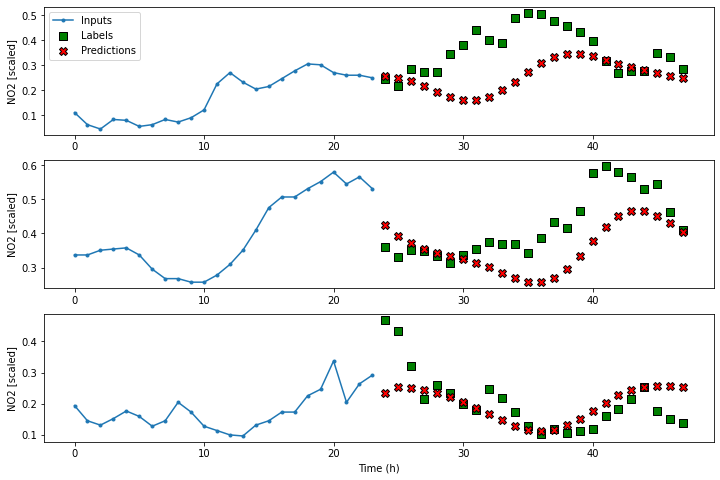

In [6]:
multi_window.plot(AR_LSTM, plot_col='NO2')

In [7]:
# Mean Absolute Error
print(ms_performance['AR - LSTM'][1])

0.12373507022857666


In [8]:
# List previous multi step results to be used for comparison

multi_model_list = ['Baseline - Last', 'Baseline - Repeat', 'Linear', 'Dense', 'LSTM', 'CNN', 'CNN + LSTM']

multi_mae_val = [0.33, 0.328, 0.08, 0.079, 0.072, 0.087, 0.078]
multi_mae_test = [0.257, 0.267, 0.109, 0.112, 0.108, 0.113, 0.113]

# Add AR - LSTM model results
multi_model_list.append('AR - LSTM')

multi_mae_val.append(ms_val_performance['AR - LSTM'][1])
multi_mae_test.append(ms_performance['AR - LSTM'][1])

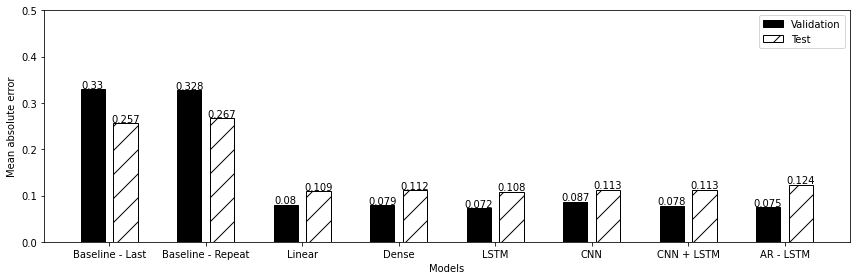

In [9]:
# Compare the MAEs of the CNN, LSTM, DNN linear model and the baselines
x = np.arange(len(multi_model_list))

fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(x - 0.17, multi_mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.17, multi_mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel("Mean absolute error")
ax.set_xlabel("Models")

for index, value in enumerate(multi_mae_val):
    plt.text(x=index - 0.17, y=value + 0.0025, s=str(round(value, 3)), ha='center')
    
for index, value in enumerate(multi_mae_test):
    plt.text(x=index + 0.17, y=value + 0.0025, s=str(round(value, 3)), ha='center')
    
plt.ylim(0, 0.5)
plt.xticks(ticks=x, labels=multi_model_list)
plt.legend(loc='best')
plt.tight_layout()

In [10]:
# Record end time

end = dt.now()
elapsed = end - start

print("The program took: %02d:%02d:%02d:%02d" % (elapsed.days, elapsed.seconds // 3600, elapsed.seconds // 60 % 60, elapsed.seconds % 60))

The program took: 00:00:08:38
